<a href="https://colab.research.google.com/github/kulkarnivinayv/Analysis-of-Bike-Sharing-Demand-Prediction-/blob/main/Analysis_of_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [2]:
import pandas as pd
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project2/SeoulBikeData.csv", encoding= 'unicode_escape', index_col = 0)
df.head(20)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
Date,,,,,,,,,,,,,
01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes


In [5]:
ddf = df.copy()
ddf.tail()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
Date,,,,,,,,,,,,,
30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [6]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8760 entries, 01/12/2017 to 30/11/2018
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
dtypes: float64(6), int64(4), object(3)
mem

In [7]:
# Statistical Information of DF

ddf.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [8]:
# Finding unique values

ddf.apply(lambda x: len(x.unique()))

Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

# **Preprocessing for Dataset**

In [9]:
ddf.isnull().sum()

Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

**This Dataset consist of 8760 (365*24) entries and 14 columns.**


In [10]:
#Rename the complex columns names for easiness
ddf=df.rename(columns={'Rented Bike Count':'RentBikeCount',
                                'Temperature(°C)':'Temp',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'WindSpeed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'DewPointTemp',
                                'Solar Radiation (MJ/m2)':'SolarRadi',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'FunctioningDay'})

ddf.head()

,RentBikeCount,Hour,Temp,Humidity,WindSpeed,Visibility,DewPointTemp,SolarRadi,Rainfall,Snowfall,Seasons,Holiday,FunctioningDay
Date,,,,,,,,,,,,,
01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


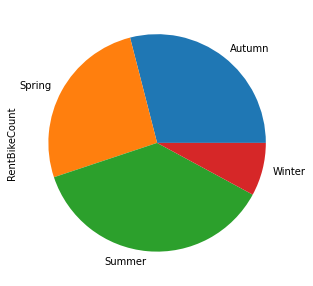

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
ddf.groupby(["Seasons"])["RentBikeCount"].sum().plot.pie()

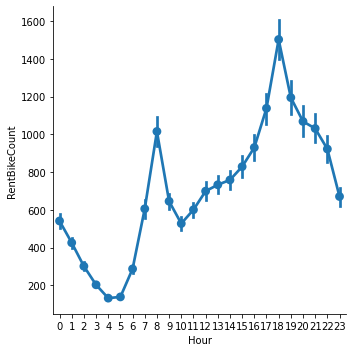

In [18]:
g = sns.factorplot(data = ddf,
               x = "Hour",
               y = "RentBikeCount", 
               ci = 95
               )

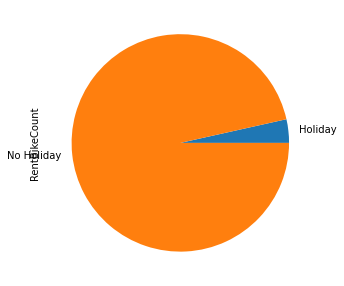

In [19]:
plt.figure(figsize=(5,5))
ddf.groupby(["Holiday"])["RentBikeCount"].sum().plot.pie()

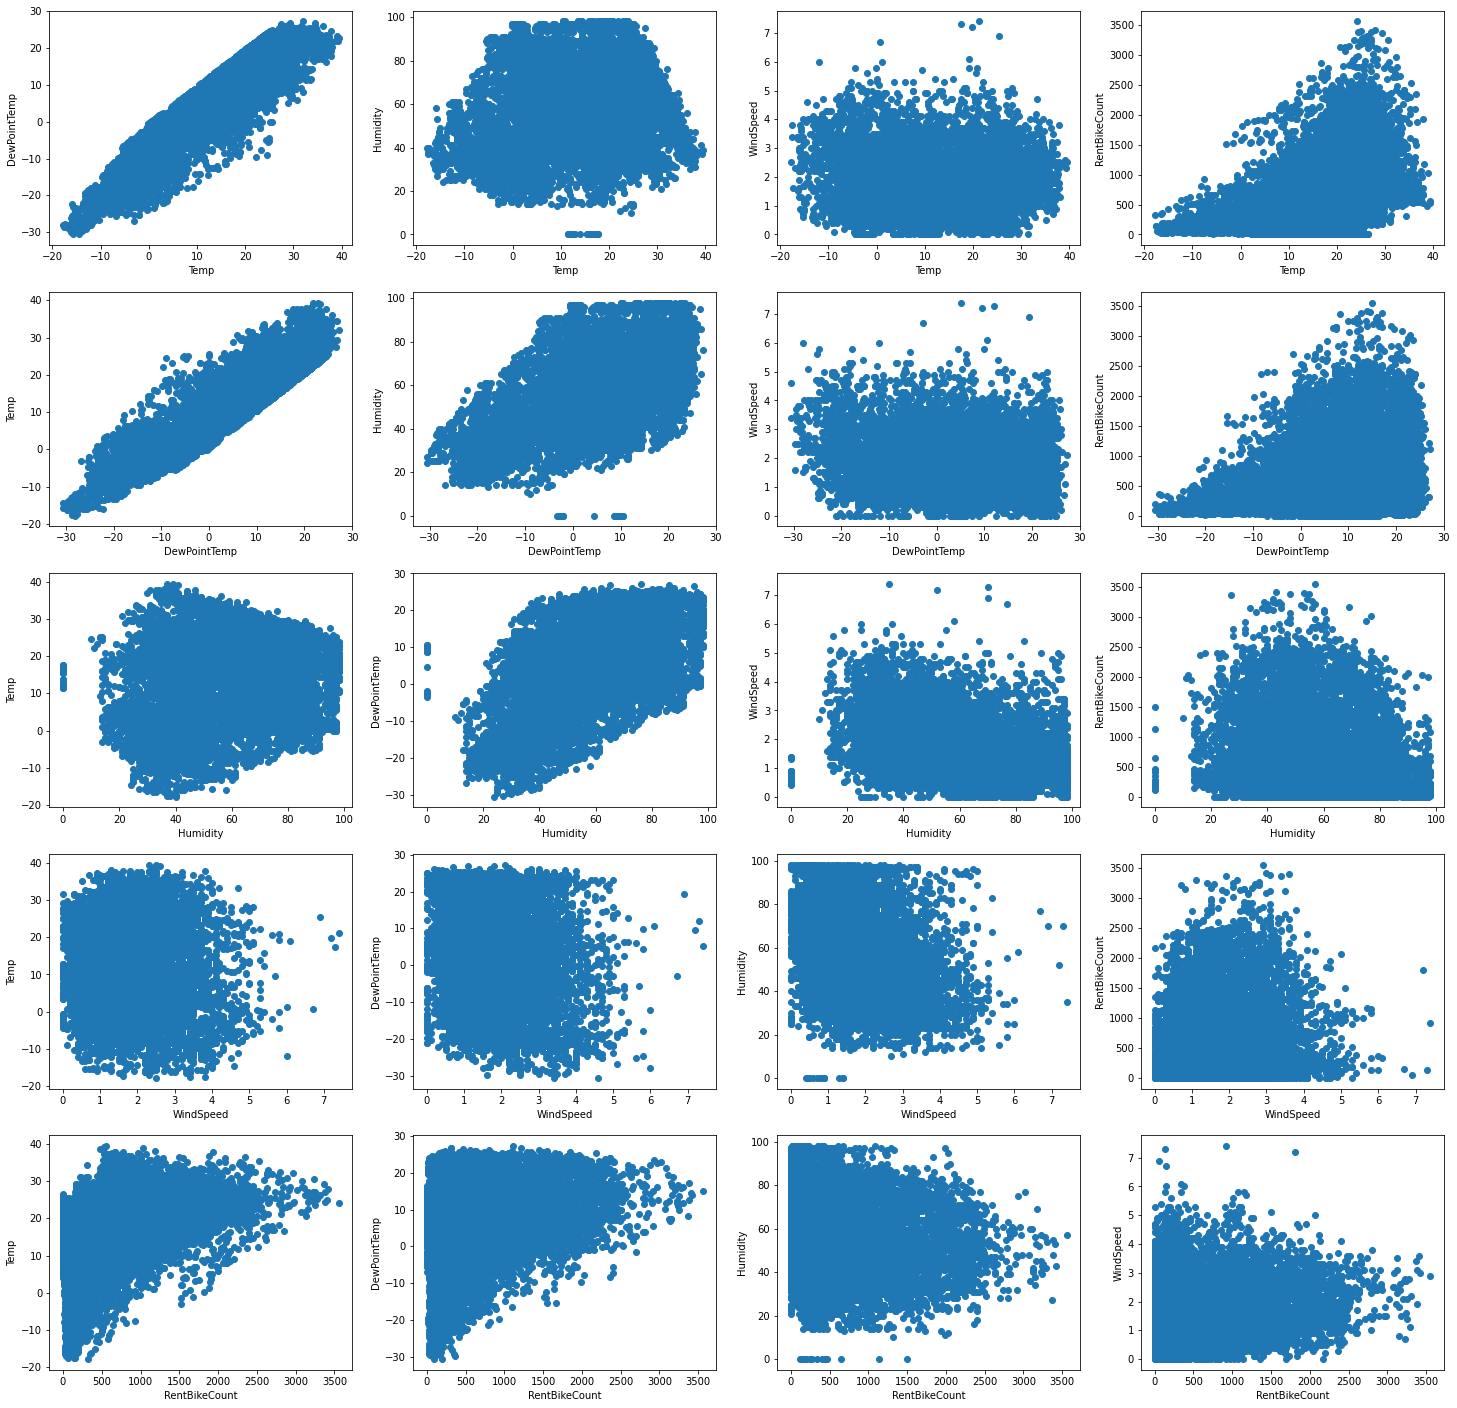

In [21]:
import statsmodels.api as sm

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(25,25))

columns = ['Temp', 'DewPointTemp', 'Humidity', 'WindSpeed', 'RentBikeCount']

ax= axes.flatten()

idx = 0
for i, val1 in enumerate(columns):
  for j, val2 in enumerate(columns):
    if val1!=val2:
        ax[idx].scatter(ddf[val1], ddf[val2])
        ax[idx].set_xlabel(val1)
        ax[idx].set_ylabel(val2)
        idx+=1

plt.show()

Index(['RentBikeCount', 'Hour', 'Temp', 'Humidity', 'WindSpeed', 'Visibility',
       'DewPointTemp', 'SolarRadi', 'Rainfall', 'Snowfall', 'Seasons',
       'Holiday', 'FunctioningDay'],
      dtype='object')


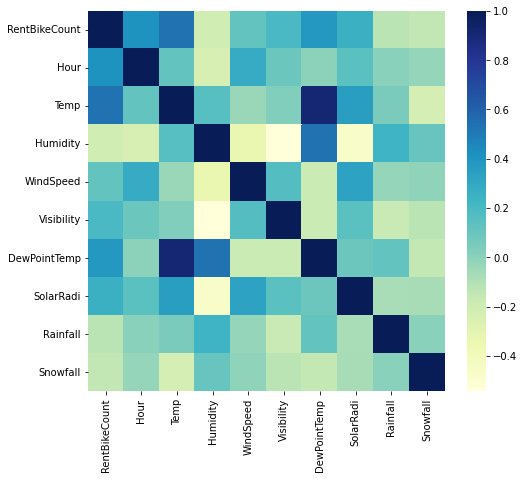

In [22]:
print(ddf.columns)
corr = ddf.corr(method='pearson')
plt.figure(figsize = (8,7))

g = sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, cmap="YlGnBu")

In [23]:
corr = ddf.corr(method='pearson')
print('------ Positive/negative correlation with predictor variable(count) --------')
print(corr['RentBikeCount'])
print('------------------------------')

------ Positive/negative correlation with predictor variable(count) --------
RentBikeCount    1.000000
Hour             0.410257
Temp             0.538558
Humidity        -0.199780
WindSpeed        0.121108
Visibility       0.199280
DewPointTemp     0.379788
SolarRadi        0.261837
Rainfall        -0.123074
Snowfall        -0.141804
Name: RentBikeCount, dtype: float64
------------------------------


In [24]:
from scipy.stats import pearsonr, probplot, norm, shapiro
import numpy as np

rho = ddf.corr().round(2)
pval = ddf.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: "".join(["*" for t in [0.01, 0.05, 0.1] if x <= t]))
corr_sig = rho.astype(str) + p
corr_sig

,RentBikeCount,Hour,Temp,Humidity,WindSpeed,Visibility,DewPointTemp,SolarRadi,Rainfall,Snowfall
RentBikeCount,1.0***,0.41***,0.54***,-0.2***,0.12***,0.2***,0.38***,0.26***,-0.12***,-0.14***
Hour,0.41***,1.0***,0.12***,-0.24***,0.29***,0.1***,0.0,0.15***,0.01,-0.02**
Temp,0.54***,0.12***,1.0***,0.16***,-0.04***,0.03***,0.91***,0.35***,0.05***,-0.22***
Humidity,-0.2***,-0.24***,0.16***,1.0***,-0.34***,-0.54***,0.54***,-0.46***,0.24***,0.11***
WindSpeed,0.12***,0.29***,-0.04***,-0.34***,1.0***,0.17***,-0.18***,0.33***,-0.02*,-0.0
Visibility,0.2***,0.1***,0.03***,-0.54***,0.17***,1.0***,-0.18***,0.15***,-0.17***,-0.12***
DewPointTemp,0.38***,0.0,0.91***,0.54***,-0.18***,-0.18***,1.0***,0.09***,0.13***,-0.15***
SolarRadi,0.26***,0.15***,0.35***,-0.46***,0.33***,0.15***,0.09***,1.0***,-0.07***,-0.07***
Rainfall,-0.12***,0.01,0.05***,0.24***,-0.02*,-0.17***,0.13***,-0.07***,1.0***,0.01
Snowfall,-0.14***,-0.02**,-0.22***,0.11***,-0.0,-0.12***,-0.15***,-0.07***,0.01,1.0***


In [28]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error

def split_dataset(df):
  features = df.columns.values.tolist()
  features.remove('RentBikeCount')

  X = df[features]
  y = df['RentBikeCount']
  yLog = np.log1p(y)
  X_train, X_test, y_train, y_test = train_test_split(X, yLog, test_size=0.3, random_state=101)
  return X_train, X_test, y_train, y_test

def plot_predictions(y_test, pred):
  sns.scatterplot(x = y_test, y = pred)
  plt.xlabel('RentBikeCount')
  plt.ylabel('Predictions')
  plt.show()

  sns.distplot((y_test-pred),bins=100, color = 'gray')

def evaluation(y_test, pred):
  r2 = r2_score(y_test,pred)
  print(f"R2: {r2*100} %")
  print(f"RMSE: {np.sqrt(mean_squared_error(y_test, pred))}")
  print('RMSLE:', np.sqrt(metrics.mean_squared_log_error(np.exp(y_test), np.exp(pred))))

In [29]:
X_train, X_test, y_train, y_test = split_dataset(ddf)

In [34]:
print('Size of X_Trian is',X_train.shape)
print('Size of X_Test is',X_test.shape)
print('Size of y_Trian is',y_train.shape)
print('Size of y_Test is',y_test.shape)

Size of X_Trian is (6132, 12)
Size of X_Test is (2628, 12)
Size of y_Trian is (6132,)
Size of y_Test is (2628,)


In [36]:
X_train

,Hour,Temp,Humidity,WindSpeed,Visibility,DewPointTemp,SolarRadi,Rainfall,Snowfall,Seasons,Holiday,FunctioningDay
Date,,,,,,,,,,,,
03/06/2018,16,30.4,28,3.6,1790,9.8,2.48,0.0,0.0,Summer,No Holiday,Yes
23/07/2018,16,34.8,47,2.2,1839,21.8,1.32,0.0,0.0,Summer,No Holiday,Yes
20/02/2018,22,0.5,22,2.9,2000,-18.8,0.00,0.0,0.0,Winter,No Holiday,Yes
15/10/2018,11,16.7,65,1.5,675,10.0,1.42,0.0,0.0,Autumn,No Holiday,Yes
16/06/2018,9,20.4,54,1.5,2000,10.7,1.88,0.0,0.0,Summer,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
25/12/2017,23,-1.0,55,1.9,2000,-8.9,0.00,0.0,0.0,Winter,Holiday,Yes
26/07/2018,7,27.7,75,1.2,1103,22.8,0.10,0.0,0.0,Summer,No Holiday,Yes
30/10/2018,14,10.7,33,1.7,2000,-4.9,2.12,0.0,0.0,Autumn,No Holiday,Yes
